In [1]:
from CookieTTS._2_ttm.flowtts.model import FlowTTS
from CookieTTS._2_ttm.flowtts.model import load_model
from CookieTTS._2_ttm.flowtts.hparams import create_hparams
from CookieTTS.utils.audio.stft import TacotronSTFT, STFT
from CookieTTS.utils.text import text_to_sequence

import sys
sys.path.append('../_4_mtw/waveglow') # add WaveGlow to System path for easier importing
import numpy as np
import torch

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import IPython.display as ipd

D:\Miniconda\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
D:\Miniconda\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
def plot_data(data, title=None, figsize=(20, 3)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        if title:
            axes[i].set_title(title[i])
        axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                       interpolation='none')

In [3]:
hparams = create_hparams()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



tensor([5], device='cuda:0')
G:\TwiBot\CookiePPPTTS\CookieTTS\_2_ttm\flowtts\outdir\best_model
On iter 750
Flow 0 using Normal Backprop
Flow 1 using Normal Backprop
Flow 2 using Normal Backprop
Flow 3 using Normal Backprop
Flow 4 using Normal Backprop
Flow 5 using Normal Backprop
Flow 6 using Normal Backprop
Flow 7 using Normal Backprop
Flow 8 using Normal Backprop
Flow 9 using Normal Backprop
mask.shape = torch.Size([4, 91, 1])
scores.shape = torch.Size([4, 91, 16])
attention.shape = torch.Size([4, 91, 16])
value.shape = torch.Size([4, 16, 160])
[mean -4.367637] [max -2.109905] [min -6.866342]
mask.shape = torch.Size([4, 91, 1])
scores.shape = torch.Size([4, 91, 16])
attention.shape = torch.Size([4, 91, 16])
value.shape = torch.Size([4, 16, 160])
[mean -4.364240] [max -2.152870] [min -6.802822]
mask.shape = torch.Size([4, 91, 1])
scores.shape = torch.Size([4, 91, 16])
attention.shape = torch.Size([4, 91, 16])
value.shape = torch.Size([4, 16, 160])
[mean -4.365337] [max -2.094365] [min

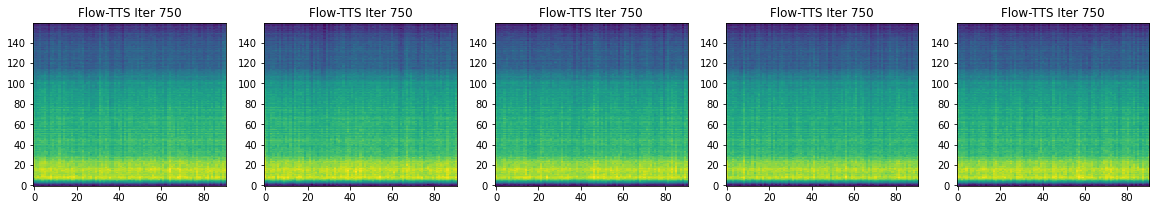

In [4]:
checkpoint_paths = [
    r"G:\TwiBot\CookiePPPTTS\CookieTTS\_2_ttm\flowtts\outdir\best_model",
]

n_attempts = 5

# Text
text = "One. two. Three."
sequence = np.array(text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.autograd.Variable(
    torch.from_numpy(sequence)).cuda().long()
# Speaker IDs
speaker_ids = torch.LongTensor([5,]).cuda()
print(speaker_ids)
# Generate
with torch.no_grad():
    for checkpoint_path in checkpoint_paths:
        print(checkpoint_path)
        checkpoint = torch.load(checkpoint_path)
        iteration = checkpoint['iteration']
        print(f"On iter {iteration}")
        model = load_model(hparams)
        model.load_state_dict(checkpoint['state_dict'])
        _ = model.cuda().eval()
        mel_outputs = []
        for i in range(n_attempts):
            mel_output, *_ = model.inference(sequence, speaker_ids, sigma=0.10)
            print(f'[mean {mel_output.mean().item():.6f}] [max {mel_output.max().item():.6f}] [min {mel_output.min().item():.6f}]')
            mel_outputs.append(mel_output)
        plot_data((*[x.float().cpu().numpy()[0] for x in mel_outputs],), title=[f'Flow-TTS Iter {iteration}',]*n_attempts)

## Other stuff

In [5]:
import numpy as np
sigma = 1.0
0.5 * np.log(2 * np.pi) + np.log(sigma)

0.9189385332046727

In [6]:
(0.5 * np.log(2 * np.pi) + np.log(sigma))*10

9.189385332046726

In [7]:
print(
    f"{.9189385332046727:6.4}",
    f"{9.189385332046727:6.4}",
    f"{99.189385332046727:6.4}",
    f"{999.189385332046727:6.4}",
    f"{-9.189385332046727:6.4}",
     sep='\n',)

0.9189
 9.189
 99.19
 999.2
-9.189


In [8]:
2.718281828459**6

403.42879349269464